<a href="https://colab.research.google.com/github/xAIdrian/MachineLearning/blob/develop/tsf_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [ ]:
# Loading the uploaded CSV file
import pandas as pd

# Reading the CSV file
data_path = '/content/drive/MyDrive/TSF/tsf_data.csv'
data = pd.read_csv(data_path)

# Displaying the first few rows of the dataset
data.head()

,Unnamed: 0,winddirection,windspeed,temperature,precipitation,evaporation,clLobith,qOlst,clAndijk,clFrieseKust,clMarkermeerMiddenB,clRotterdamseHoek,clWieringenOost
0,31/03/2021,250,9,12.5,0.0,25,82,345.107328,90.148936,88.555556,160.261905,88.517730,95.950617
1,01/04/2021,19,52,7.4,0.0,25,82,343.223750,97.748252,89.608392,158.290780,90.377622,98.604167
2,02/04/2021,353,52,6.3,0.0,11,86,341.360000,112.013889,88.493056,158.258741,93.104167,98.798611
3,03/04/2021,360,50,6.6,0.0,14,86,337.779444,115.194444,78.111111,158.076389,92.930556,97.590278
4,04/04/2021,253,48,6.5,0.0,12,92,331.815347,112.118056,82.222222,158.381944,92.263889,97.062500


# Analyze Trends and Seasonality in clAndijk

<ipython-input-2-3babaf0ac668>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])


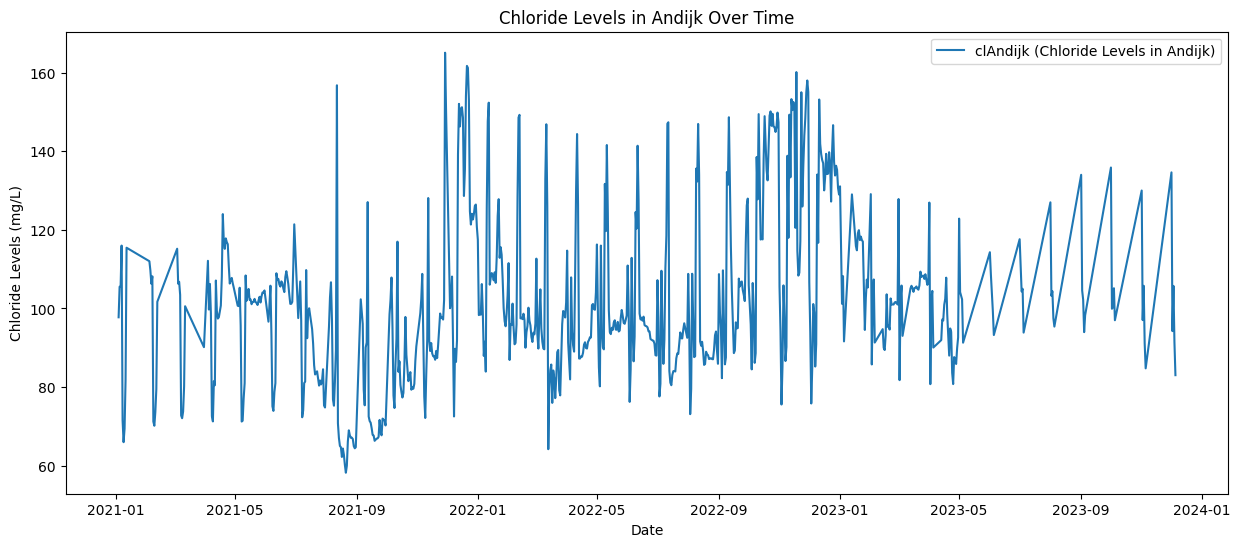

In [ ]:
# Importing necessary libraries for visualization and time-series analysis
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Converting the date column to datetime
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])

# Setting the date column as the index for time-series analysis
data.set_index('Unnamed: 0', inplace=True)

# Sorting the data by the date index
data.sort_index(inplace=True)

# Plotting the time series for clAndijk
plt.figure(figsize=(15, 6))
plt.plot(data['clAndijk'], label='clAndijk (Chloride Levels in Andijk)')
plt.title('Chloride Levels in Andijk Over Time')
plt.xlabel('Date')
plt.ylabel('Chloride Levels (mg/L)')
plt.legend()
plt.show()

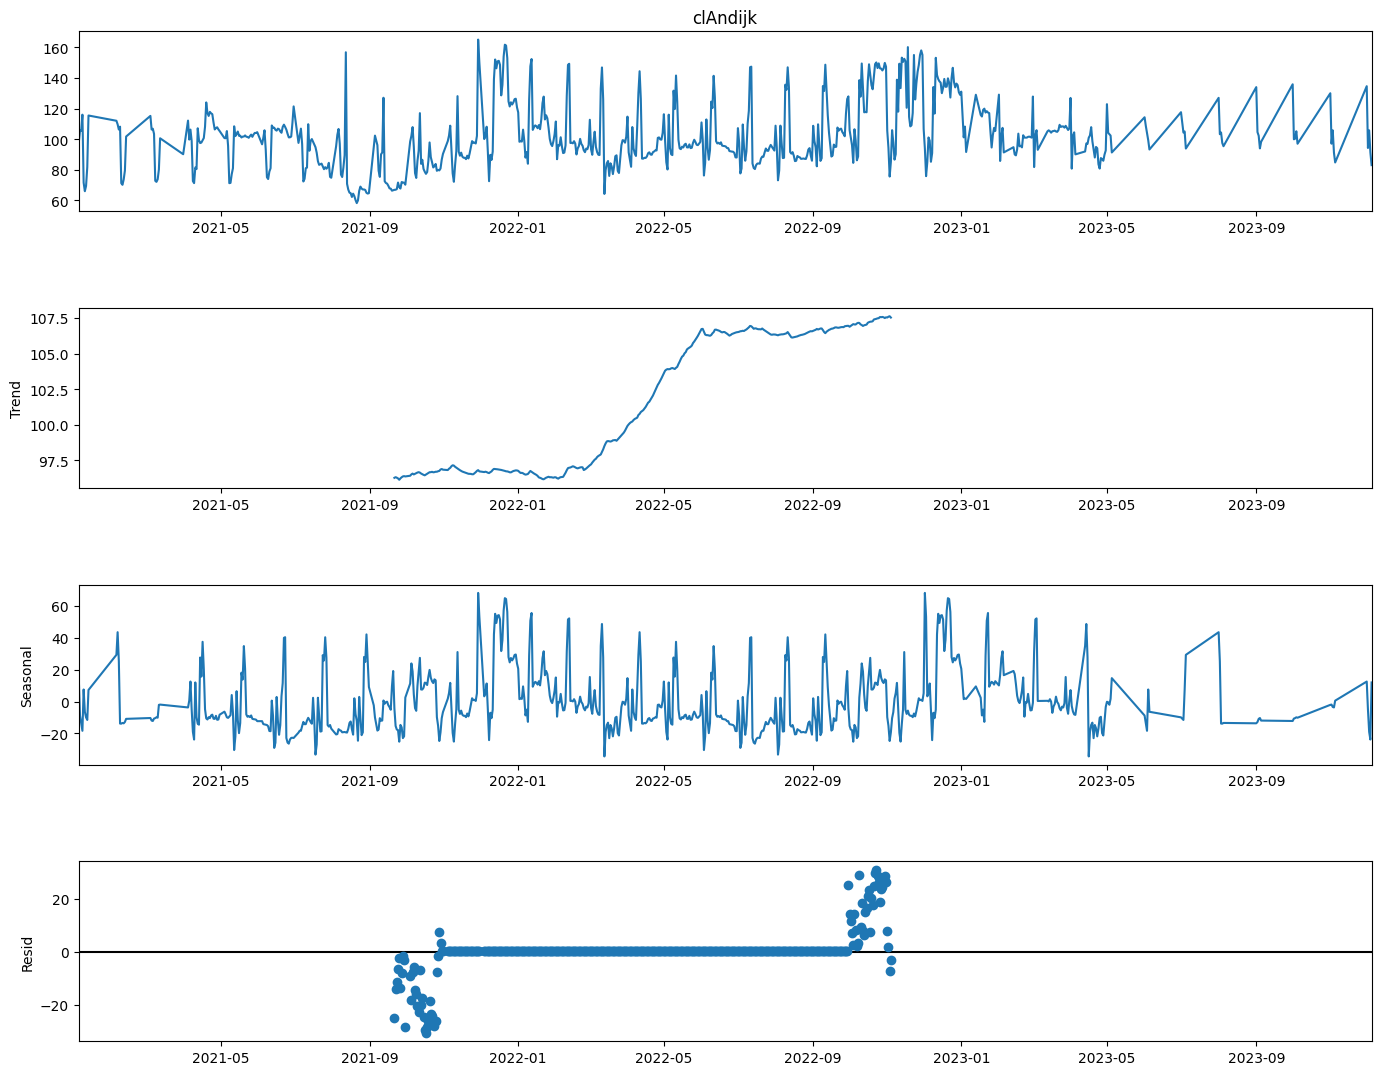

In [ ]:
# Applying seasonal decomposition to the sorted 'clAndijk' series
# Using a seasonal frequency of 365 days
decomposition_sorted = seasonal_decompose(data['clAndijk'], period=365, model='additive')

# Re-plotting the decomposition components
decomposition_plot_sorted = decomposition_sorted.plot()
decomposition_plot_sorted.set_size_inches(15, 12)
plt.show()

The seasonal decomposition plot provides a detailed view of the clAndijk time series, broken down into three main components:

- Trend: The underlying trend in the data appears relatively stable with some fluctuations.
- Seasonal: The seasonal component does not show a strong and clear yearly pattern, indicating that other periodic influences might be affecting chloride levels.
- Residual: The residual component represents noise or random fluctuations in the data.

In [ ]:
# Calculating the correlation of 'clAndijk' with other features, including a 30-day lag for 'qOlst' and 'clLobith'
correlation_with_clAndijk = data.corrwith(data['clAndijk'], method='pearson')

# Calculating the 30-day lag correlation for 'qOlst' and 'clLobith'
correlation_with_clAndijk_lag_30 = data[['qOlst', 'clLobith']].shift(30).corrwith(data['clAndijk'], method='pearson')

# Combining the correlation results
correlation_summary = pd.DataFrame({
    "Original Correlation": correlation_with_clAndijk,
    "30-Day Lag Correlation": correlation_with_clAndijk_lag_30
})

correlation_summary.dropna()

,Original Correlation,30-Day Lag Correlation
clLobith,0.099239,0.238421
qOlst,-0.056080,-0.302952


These results confirm the known 30-day lag correlation between qOlst, clLobith, and the target variable clAndijk.

## Correlation Matrix for All Columns

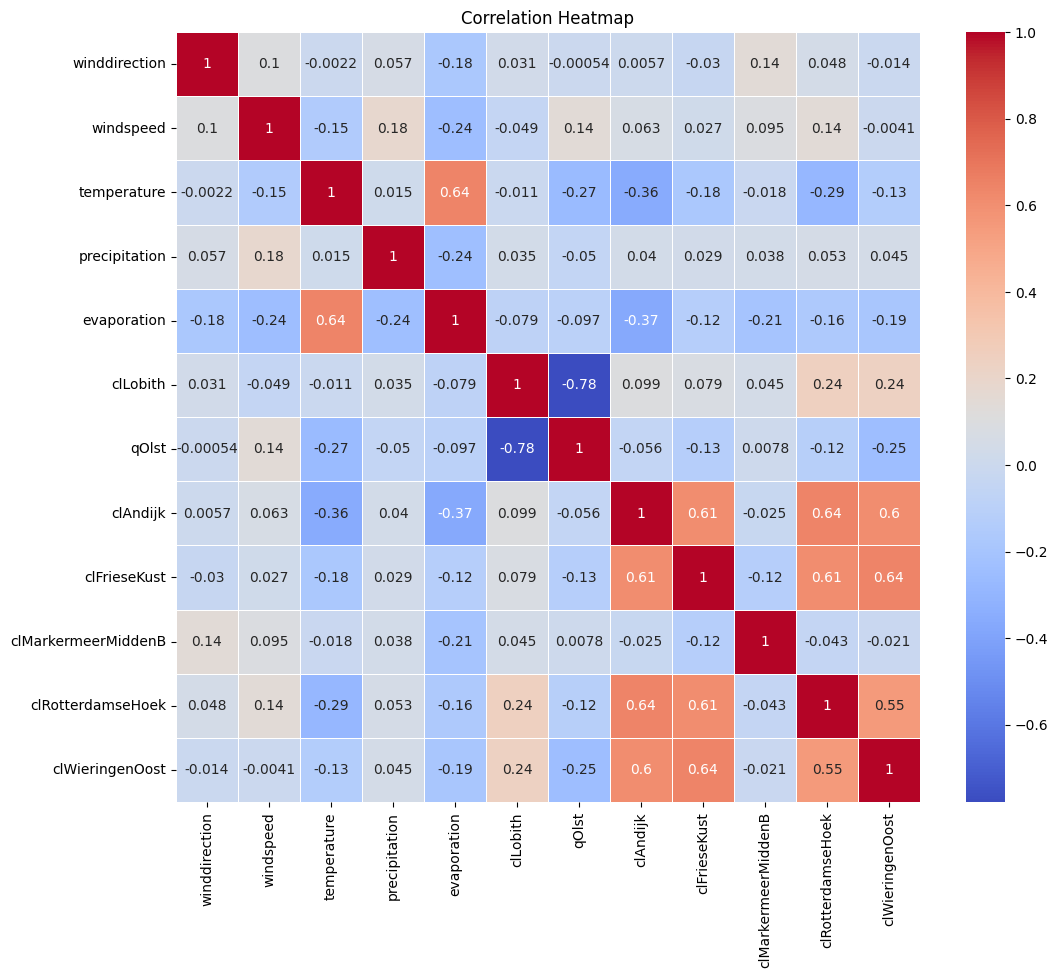

clAndijk               1.000000
clRotterdamseHoek      0.639180
clFrieseKust           0.610003
clWieringenOost        0.604196
clLobith               0.099239
windspeed              0.062984
precipitation          0.040332
winddirection          0.005655
clMarkermeerMiddenB   -0.025235
qOlst                 -0.056080
temperature           -0.359408
evaporation           -0.366261
Name: clAndijk, dtype: float64

In [ ]:
# Calculating the correlation matrix for all columns
correlation_matrix = data.corr(method='pearson')

# Plotting a heatmap for visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# Returning the correlation values with the target variable 'clAndijk'
correlation_with_clAndijk = correlation_matrix['clAndijk']
correlation_with_clAndijk.sort_values(ascending=False)

- Chloride Levels in Other Locations: Variables like clRotterdamseHoek, clFrieseKust, and clWieringenOost have strong positive correlations with clAndijk, indicating that chloride levels in these locations might be significant features for forecasting clAndijk.
- Weather Variables: windspeed, precipitation, temperature, and evaporation have weak to moderate correlations. These weather-related variables might be indirectly influencing chloride levels.

## 30-Day Lag Correlation Analysis

In [ ]:
# Calculating the 30-day lag correlation for all features with 'clAndijk'
correlation_with_clAndijk_lag_30 = data.shift(30).corrwith(data['clAndijk'], method='pearson')

# Combining the original and 30-day lag correlation results
correlation_summary_all = pd.DataFrame({
    "Original Correlation": correlation_with_clAndijk,
    "30-Day Lag Correlation": correlation_with_clAndijk_lag_30
})

# Sorting by the absolute value of the 30-day lag correlation to highlight the most influential features
correlation_summary_all['abs_lag_30'] = correlation_summary_all['30-Day Lag Correlation'].abs()
correlation_summary_all_sorted = correlation_summary_all.sort_values('abs_lag_30', ascending=False).drop(columns=['abs_lag_30'])

correlation_summary_all_sorted

,Original Correlation,30-Day Lag Correlation
clWieringenOost,0.604196,0.493114
clAndijk,1.000000,0.436155
clRotterdamseHoek,0.639180,0.390659
clFrieseKust,0.610003,0.370263
evaporation,-0.366261,-0.330972
qOlst,-0.056080,-0.302952
clLobith,0.099239,0.238421
temperature,-0.359408,-0.205348
clMarkermeerMiddenB,-0.025235,0.046633
windspeed,0.062984,-0.028927


- Chloride Levels in Other Locations: The strong positive correlations with other chloride level variables indicate that historical data from these locations might be significant for forecasting clAndijk.
- Weather Variables: evaporation shows a moderate negative correlation, suggesting that historical evaporation levels might also be influential.
- Temperature: The negative lagged correlation with temperature suggests that temperature changes might have a delayed negative effect on chloride levels.

In [ ]:
# Defining different lag values
lags = [7, 15, 30]

# Initializing a DataFrame to store the lagged correlation results for all features
lagged_correlation_all_features = pd.DataFrame(columns=lags, index=data.columns[:-2])  # Excluding the binned features

# Calculating the lagged correlation for each feature and lag value
for lag in lags:
    lagged_correlation_all_features[lag] = data.shift(lag).corrwith(data['clAndijk'], method='pearson')

# Returning the calculated lagged correlations, sorted by the absolute value of the 30-day lag correlation
lagged_correlation_all_features['abs_lag_30'] = lagged_correlation_all_features[30].abs()
lagged_correlation_all_features_sorted = lagged_correlation_all_features.sort_values('abs_lag_30', ascending=False).drop(columns=['abs_lag_30'])

lagged_correlation_all_features_sorted

,7,15,30
clAndijk,0.340521,0.288153,0.436155
clFrieseKust,0.324673,0.264164,0.370263
evaporation,-0.126521,-0.083936,-0.330972
qOlst,-0.024523,-0.122484,-0.302952
clLobith,0.071342,0.099147,0.238421
temperature,-0.239268,-0.104714,-0.205348
clMarkermeerMiddenB,0.001167,-0.025623,0.046633
windspeed,-0.005226,-0.077804,-0.028927
precipitation,-0.048806,-0.053162,0.021257
winddirection,-0.062242,-0.023125,0.016898


- 7-Day Lag: Correlation with chloride levels in Andijk (clAndijk) after 7 days.
- 15-Day Lag: Correlation with clAndijk after 15 days.
- 30-Day Lag: Correlation with clAndijk after 30 days.

Key Insights:
- Chloride Levels in Other Locations: Variables like clWieringenOost, clRotterdamseHoek, and clFrieseKust show strong positive correlations, particularly at the 30-day lag. These might be significant features with delayed effects.
- Evaporation: Negative correlation at the 30-day lag (-0.331), suggesting that evaporation levels from a month earlier may have a negative effect.
- Water Flow (qOlst): The 30-day lag correlation of -0.303 confirms the previously known relationship.
- Temperature: Negative correlation with the target variable at all lags, with the strongest correlation at the 7-day lag.
- The correlations with wind direction and wind speed remain weak across all lags.

# Visualizing wind influence

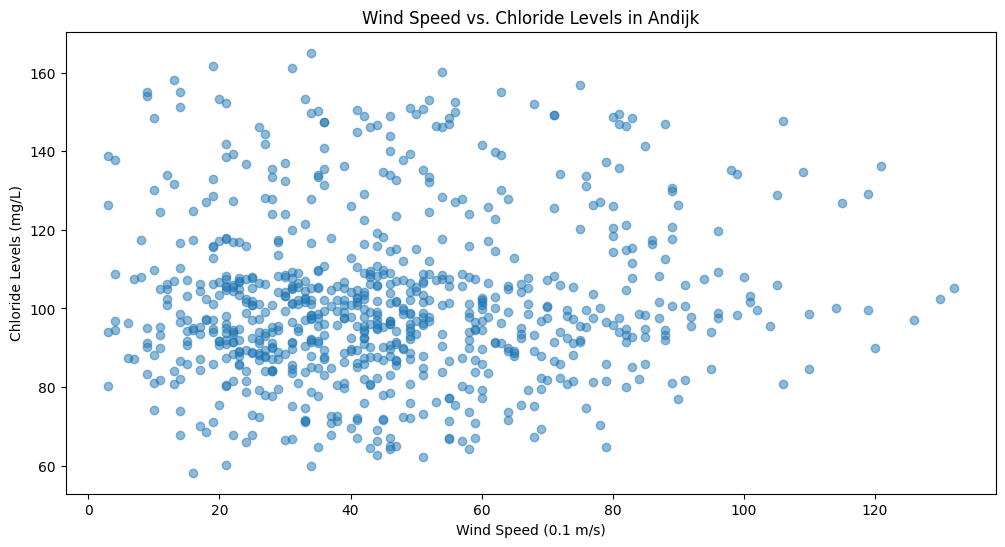

In [ ]:
# Plotting the relationship between windspeed and clAndijk
plt.figure(figsize=(12, 6))
plt.scatter(data['windspeed'], data['clAndijk'], alpha=0.5)
plt.title('Wind Speed vs. Chloride Levels in Andijk')
plt.xlabel('Wind Speed (0.1 m/s)')
plt.ylabel('Chloride Levels (mg/L)')
plt.show()

While there seems to be a spread across different wind speeds, there's no clearly defined pattern or linear relationship.

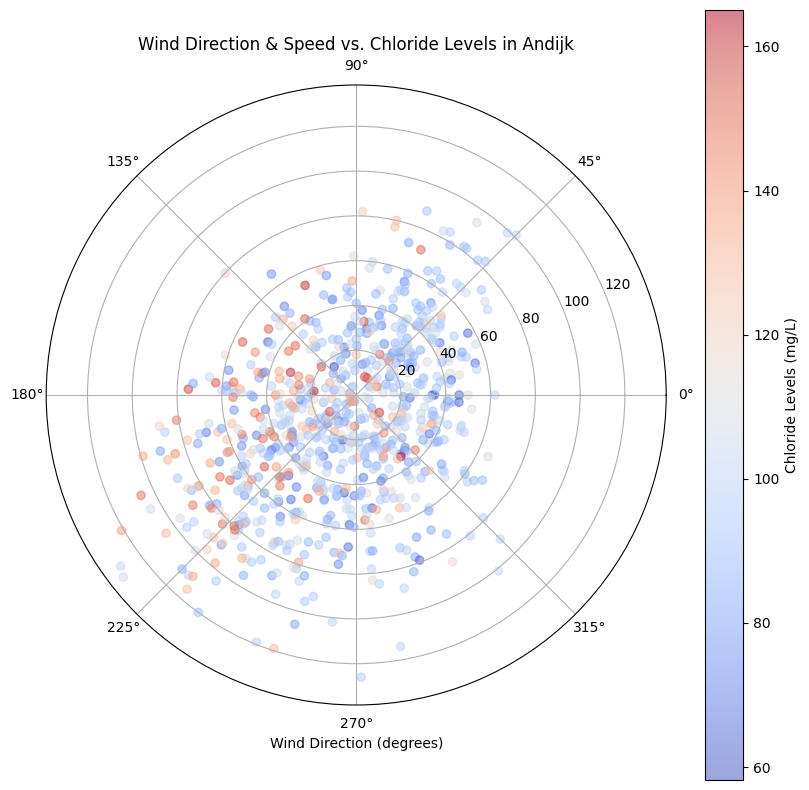

In [ ]:
# Importing NumPy for mathematical operations
import numpy as np

# Plotting a polar plot to visualize the relationship between wind direction, wind speed, and clAndijk
plt.figure(figsize=(10, 10))
plt.subplot(111, projection='polar')
plt.scatter(data['winddirection'] * (np.pi / 180), data['windspeed'], c=data['clAndijk'], cmap='coolwarm', alpha=0.5)
plt.title('Wind Direction & Speed vs. Chloride Levels in Andijk')
plt.xlabel('Wind Direction (degrees)')
plt.colorbar(label='Chloride Levels (mg/L)')
plt.show()

The plot does not reveal a clear and simple pattern between wind direction, wind speed, and chloride levels. The relationship appears to be complex and possibly influenced by other factors.

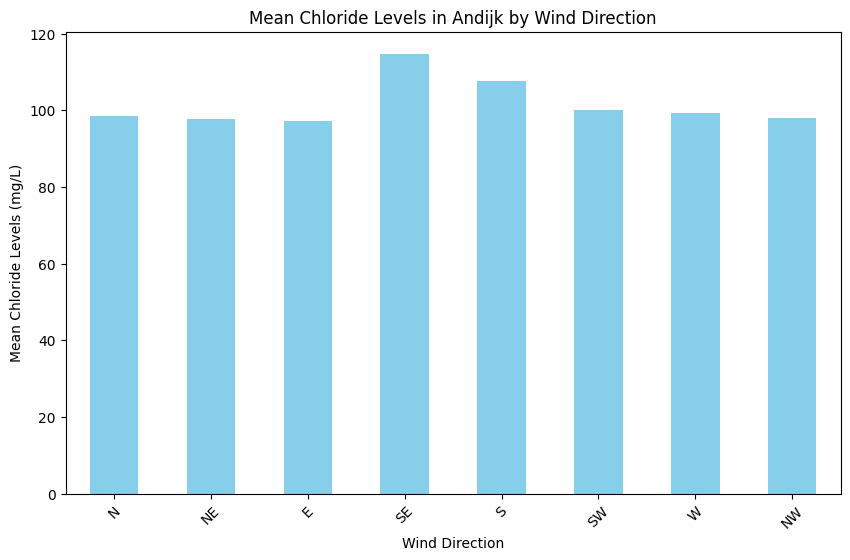

wind_direction_bin
N      98.666070
NE     97.668207
E      97.229150
SE    114.777645
S     107.653837
SW    100.056716
W      99.277190
NW     98.032207
Name: clAndijk, dtype: float64

In [ ]:
# Defining the wind direction bins and labels
direction_bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]
direction_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

# Binning the wind direction
data['wind_direction_bin'] = pd.cut(data['winddirection'], bins=direction_bins, labels=direction_labels, include_lowest=True)

# Grouping by the wind direction bins to calculate the mean chloride levels
wind_direction_clAndijk = data.groupby('wind_direction_bin')['clAndijk'].mean()

# Plotting the mean chloride levels by wind direction bins
plt.figure(figsize=(10, 6))
wind_direction_clAndijk.plot(kind='bar', color='skyblue')
plt.title('Mean Chloride Levels in Andijk by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Mean Chloride Levels (mg/L)')
plt.xticks(rotation=45)
plt.show()

# Returning the calculated mean chloride levels
wind_direction_clAndijk

- South-Eastern Influence: The highest mean chloride levels correspond to winds coming from the South-East (SE) direction.
- Eastern Influence: Winds from the East (E) and North-East (NE) directions correspond to the lowest mean chloride levels.
- These observations suggest that wind direction might influence chloride levels in a spatially specific manner, with different directions having varying effects.

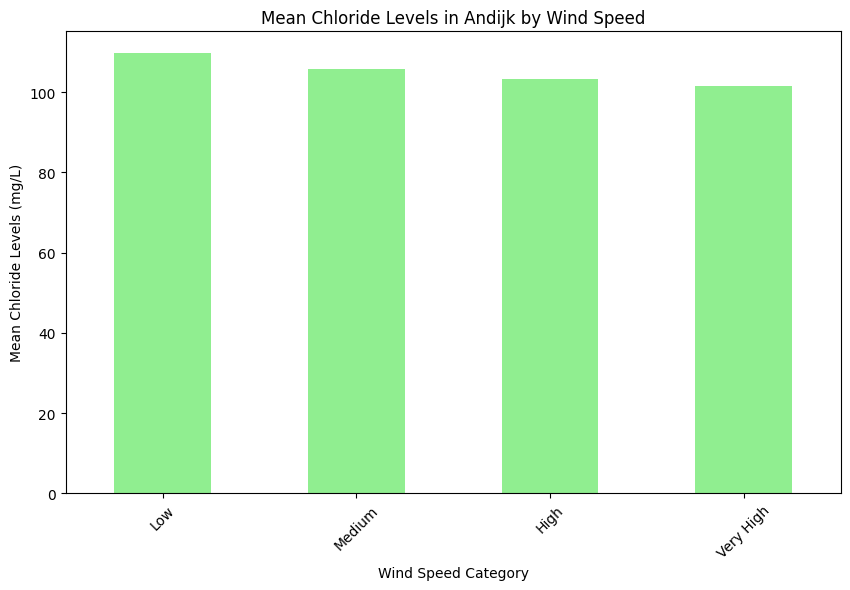

wind_speed_bin
Low          109.656914
Medium       105.766711
High         103.284215
Very High    101.466606
Name: clAndijk, dtype: float64

In [ ]:
# Defining the wind speed bins and labels
speed_bins = [0, 5, 10, 15, np.inf]
speed_labels = ['Low', 'Medium', 'High', 'Very High']

# Binning the wind speed
data['wind_speed_bin'] = pd.cut(data['windspeed'], bins=speed_bins, labels=speed_labels, include_lowest=True)

# Grouping by the wind speed bins to calculate the mean chloride levels
wind_speed_clAndijk = data.groupby('wind_speed_bin')['clAndijk'].mean()

# Plotting the mean chloride levels by wind speed bins
plt.figure(figsize=(10, 6))
wind_speed_clAndijk.plot(kind='bar', color='lightgreen')
plt.title('Mean Chloride Levels in Andijk by Wind Speed')
plt.xlabel('Wind Speed Category')
plt.ylabel('Mean Chloride Levels (mg/L)')
plt.xticks(rotation=45)
plt.show()

# Returning the calculated mean chloride levels
wind_speed_clAndijk

Decreasing Trend: The mean chloride levels appear to decrease as wind speed increases. This suggests that higher wind speeds might be associated with lower chloride levels in Andijk.

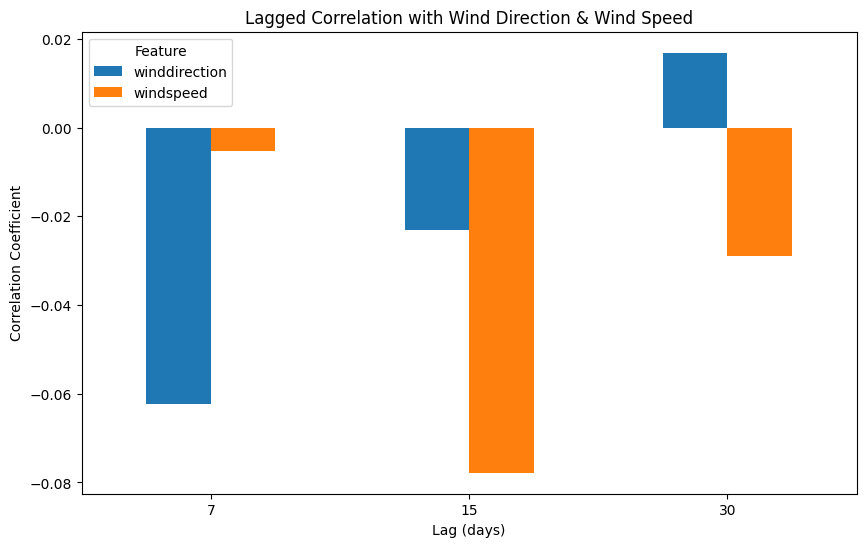

,7,15,30
winddirection,-0.062242,-0.023125,0.016898
windspeed,-0.005226,-0.077804,-0.028927


In [ ]:
# Defining different lag values
lags = [7, 15, 30]

# Initializing a DataFrame to store the lagged correlation results
lagged_correlation_wind = pd.DataFrame(index=['winddirection', 'windspeed'], columns=lags)

# Calculating the lagged correlation for each lag value
for lag in lags:
    lagged_correlation_wind[lag] = data[['winddirection', 'windspeed']].shift(lag).corrwith(data['clAndijk'], method='pearson')

# Plotting the lagged correlations
lagged_correlation_wind.T.plot(kind='bar', figsize=(10, 6))
plt.title('Lagged Correlation with Wind Direction & Wind Speed')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=0)
plt.legend(title='Feature')
plt.show()

# Returning the calculated lagged correlations
lagged_correlation_wind

- Weak Correlations: The correlations for all lags are weak, suggesting that wind direction and wind speed may not have a strong direct delayed effect on chloride levels.
- Negative Correlation with Wind Speed: The 15-day lag shows a slightly stronger negative correlation with wind speed, which might indicate that wind speed from 15 days earlier has a minor negative influence on chloride levels.

# Feature engineering

In [ ]:
data.columns

Index(['winddirection', 'windspeed', 'temperature', 'precipitation',
       'evaporation', 'clLobith', 'qOlst', 'clAndijk', 'clFrieseKust',
       'clMarkermeerMiddenB', 'clRotterdamseHoek', 'clWieringenOost',
       'wind_direction_bin', 'wind_speed_bin'],
      dtype='object')

In [ ]:
# Step 1: Creating Lagged Features
# 30-day lagged chloride levels
for col in ['clWieringenOost', 'clRotterdamseHoek', 'clFrieseKust', 'clLobith']:
    data[f'{col}_lag_30'] = data[col].shift(30)

# 15-day lagged wind speed
data['windspeed_lag_15'] = data['windspeed'].shift(15)

# Step 2: Creating Seasonal Features
# Extracting month and day of the week
data['month'] = data.index.month
data['day_of_week'] = data.index.dayofweek

# Step 3: Wind Direction Binning (Already created as 'wind_direction_bin')

# Previewing the updated DataFrame with the new features
data.head()

,winddirection,windspeed,temperature,precipitation,evaporation,clLobith,qOlst,clAndijk,clFrieseKust,clMarkermeerMiddenB,...,clWieringenOost,wind_direction_bin,wind_speed_bin,clWieringenOost_lag_30,clRotterdamseHoek_lag_30,clFrieseKust_lag_30,clLobith_lag_30,windspeed_lag_15,month,day_of_week
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2021-01-04,19,52,7.4,0.00,25,82,343.223750,97.748252,89.608392,158.290780,...,98.604167,N,Very High,NaN,NaN,NaN,NaN,NaN,1,0
2021-01-05,313,32,7.5,0.21,17,116,235.347500,105.527778,83.361111,151.475525,...,100.250000,W,Very High,NaN,NaN,NaN,NaN,NaN,1,1
2021-01-06,68,50,18.0,0.00,53,72,410.338889,105.492958,109.041667,146.868613,...,106.347222,NE,Very High,NaN,NaN,NaN,NaN,NaN,1,2
2021-01-07,276,44,15.7,0.00,30,58,414.096667,115.993007,83.312500,154.330986,...,107.243056,W,Very High,NaN,NaN,NaN,NaN,NaN,1,3
2021-01-08,307,33,16.4,0.00,27,49,515.852500,71.555556,68.590278,150.566434,...,88.916667,W,Very High,NaN,NaN,NaN,NaN,NaN,1,4


Here's a summary of the new features:

- 30-Day Lagged Chloride Levels: clWieringenOost_lag_30, clRotterdamseHoek_lag_30, clFrieseKust_lag_30, clLobith_lag_30
- 15-Day Lagged Wind Speed: windspeed_lag_15
- Month: month
- Day of the Week: day_of_week
- Wind Direction Bin: wind_direction_bin (already created earlier)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 4: Creating Interaction Features
# Interaction between wind speed and wind direction (using cosine of direction)
data['wind_interaction'] = data['windspeed'] * np.cos(data['winddirection'] * (np.pi / 180))
# Interaction between temperature and evaporation
data['temp_evap_interaction'] = data['temperature'] * data['evaporation']

# Step 5: Transformation & Normalization
# Scaling the features using StandardScaler (excluding wind_direction_bin for now)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['wind_direction_bin', 'wind_speed_bin']))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-2], index=data.index)

# Adding the wind_direction_bin back to the scaled DataFrame
data_scaled['wind_direction_bin'] = data['wind_direction_bin']

# Step 6: Handling Missing Data
# Forward filling the missing values (due to lags)
data_scaled.fillna(method='ffill', inplace=True)

# Previewing the updated DataFrame with the new features
data_scaled.head()

,winddirection,windspeed,temperature,precipitation,evaporation,clLobith,qOlst,clAndijk,clFrieseKust,clMarkermeerMiddenB,...,clWieringenOost,wind_direction_bin,wind_speed_bin,clWieringenOost_lag_30,clRotterdamseHoek_lag_30,clFrieseKust_lag_30,clLobith_lag_30,windspeed_lag_15,month,day_of_week
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2021-01-04,-1.776311,0.257195,-0.733266,-0.458924,0.438925,-0.145497,0.082591,-0.192434,-0.452977,0.711084,...,-0.423045,N,NaN,NaN,NaN,NaN,-1.612574,-1.508872,1.617182,-0.270403
2021-01-05,1.235632,-0.569677,-0.714225,-0.030782,-0.111192,1.741034,-0.730469,0.183369,-0.879059,-0.221610,...,-0.351948,W,NaN,NaN,NaN,NaN,-1.612574,-1.007226,0.822797,-0.482504
2021-01-06,-1.274320,0.174508,1.285013,-0.458924,2.364332,-0.700359,0.588436,0.181687,0.872427,-0.852084,...,-0.088558,NE,NaN,NaN,NaN,NaN,-1.612574,-0.505580,0.732919,2.566217
2021-01-07,0.856578,-0.073554,0.847085,-0.458924,0.782747,-1.477167,0.616759,0.688910,-0.882374,0.169171,...,-0.049859,W,NaN,NaN,NaN,NaN,-1.612574,-0.003934,0.322375,0.784569
2021-01-08,1.174163,-0.528333,0.980367,-0.458924,0.576454,-1.976543,1.383690,-1.457717,-1.886471,-0.346023,...,-0.841530,W,NaN,NaN,NaN,NaN,-1.612574,0.497711,0.765736,0.680547


Step 4: Interaction Features
- Wind Interaction: Created an interaction feature between wind speed and direction (wind_interaction).
- Temperature-Evaporation Interaction: Created an interaction feature between temperature and evaporation (temp_evap_interaction).

Step 5: Transformation & Normalization
- Scaling: Applied StandardScaler to all numerical features, bringing them to a similar scale.

Step 6: Handling Missing Data
- Forward Filling: Filled missing values (due to lags) using forward filling.

In [ ]:
data.head()

,winddirection,windspeed,temperature,precipitation,evaporation,clLobith,qOlst,clAndijk,clFrieseKust,clMarkermeerMiddenB,...,wind_speed_bin,clWieringenOost_lag_30,clRotterdamseHoek_lag_30,clFrieseKust_lag_30,clLobith_lag_30,windspeed_lag_15,month,day_of_week,wind_interaction,temp_evap_interaction
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2021-01-04,19,52,7.4,0.00,25,82,343.223750,97.748252,89.608392,158.290780,...,Very High,NaN,NaN,NaN,NaN,NaN,1,0,49.166966,185.0
2021-01-05,313,32,7.5,0.21,17,116,235.347500,105.527778,83.361111,151.475525,...,Very High,NaN,NaN,NaN,NaN,NaN,1,1,21.823948,127.5
2021-01-06,68,50,18.0,0.00,53,72,410.338889,105.492958,109.041667,146.868613,...,Very High,NaN,NaN,NaN,NaN,NaN,1,2,18.730330,954.0
2021-01-07,276,44,15.7,0.00,30,58,414.096667,115.993007,83.312500,154.330986,...,Very High,NaN,NaN,NaN,NaN,NaN,1,3,4.599252,471.0
2021-01-08,307,33,16.4,0.00,27,49,515.852500,71.555556,68.590278,150.566434,...,Very High,NaN,NaN,NaN,NaN,NaN,1,4,19.859896,442.8


In [ ]:
# Checking for skewness in the features
feature_skewness = data_scaled.skew().sort_values(ascending=False)

# Checking for missing values in the features
missing_values = data_scaled.isnull().sum().sort_values(ascending=False)

feature_skewness, missing_values[missing_values > 0]

<ipython-input-18-b0c699550033>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_skewness = data_scaled.skew().sort_values(ascending=False)


(precipitation               4.128979
 clWieringenOost             1.551548
 day_of_week                 1.228118
 qOlst                       1.029990
 clFrieseKust_lag_30         0.753648
 clAndijk                    0.746556
 windspeed                   0.737198
 evaporation                 0.618922
 temperature                 0.056507
 clLobith_lag_30             0.033187
 windspeed_lag_15           -0.003890
 clLobith                   -0.030213
 clRotterdamseHoek_lag_30   -0.063674
 clWieringenOost_lag_30     -0.087663
 clFrieseKust               -0.097913
 month                      -0.286337
 winddirection              -0.356095
 clRotterdamseHoek          -0.634136
 wind_speed_bin             -0.666044
 clMarkermeerMiddenB        -4.909019
 dtype: float64,
 clRotterdamseHoek_lag_30    30
 clWieringenOost_lag_30      30
 wind_speed_bin              30
 clFrieseKust_lag_30         15
 dtype: int64)

Skewness in Features:
- Positive Skewness: Features like precipitation, clWieringenOost, day_of_week, and qOlst exhibit positive skewness.
- Negative Skewness: clMarkermeerMiddenB shows significant negative skewness.

Missing Values:
- Lagged Features: The missing values in clRotterdamseHoek_lag_30, clWieringenOost_lag_30, clFrieseKust_lag_30 are expected due to the 30-day lag.
- Wind Speed Bin: The missing value in wind_speed_bin is also due to the lagging.

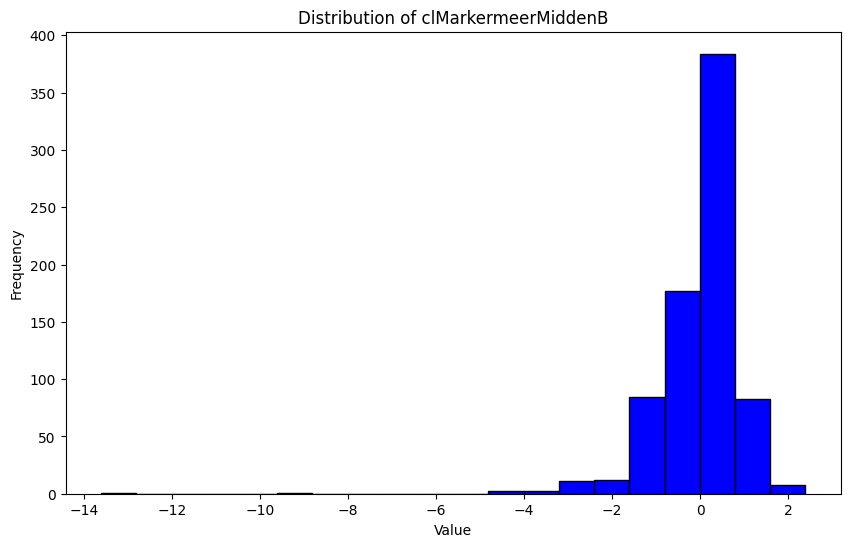

1.6732024337049132

In [ ]:
# Applying a log transformation to the 'precipitation' feature to reduce skewness
# Adding 1 to avoid log(0)
data_scaled['precipitation_log'] = np.log1p(data_scaled['precipitation'])

# Dropping the original 'precipitation' feature
data_scaled.drop(columns=['precipitation'], inplace=True)

# Checking the skewness of the transformed 'precipitation_log' feature
precipitation_log_skewness = data_scaled['precipitation_log'].skew()

# Plotting the distribution of 'clMarkermeerMiddenB' to understand its distribution
plt.figure(figsize=(10, 6))
plt.hist(data_scaled['clMarkermeerMiddenB'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of clMarkermeerMiddenB')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

precipitation_log_skewness

- Log Transformation: Applied to the precipitation feature, resulting in a new feature precipitation_log.
- clMarkermeerMiddenB Distribution: Analyzed and determined to leave as is.

In [ ]:
data.head()

,winddirection,windspeed,temperature,precipitation,evaporation,clLobith,qOlst,clAndijk,clFrieseKust,clMarkermeerMiddenB,...,wind_speed_bin,clWieringenOost_lag_30,clRotterdamseHoek_lag_30,clFrieseKust_lag_30,clLobith_lag_30,windspeed_lag_15,month,day_of_week,wind_interaction,temp_evap_interaction
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2021-01-04,19,52,7.4,0.00,25,82,343.223750,97.748252,89.608392,158.290780,...,Very High,NaN,NaN,NaN,NaN,NaN,1,0,49.166966,185.0
2021-01-05,313,32,7.5,0.21,17,116,235.347500,105.527778,83.361111,151.475525,...,Very High,NaN,NaN,NaN,NaN,NaN,1,1,21.823948,127.5
2021-01-06,68,50,18.0,0.00,53,72,410.338889,105.492958,109.041667,146.868613,...,Very High,NaN,NaN,NaN,NaN,NaN,1,2,18.730330,954.0
2021-01-07,276,44,15.7,0.00,30,58,414.096667,115.993007,83.312500,154.330986,...,Very High,NaN,NaN,NaN,NaN,NaN,1,3,4.599252,471.0
2021-01-08,307,33,16.4,0.00,27,49,515.852500,71.555556,68.590278,150.566434,...,Very High,NaN,NaN,NaN,NaN,NaN,1,4,19.859896,442.8


In [ ]:
# Checking for any remaining missing values in the dataset
missing_values_remaining = data_scaled.isnull().sum().sort_values(ascending=False)

missing_values_remaining[missing_values_remaining > 0]

clRotterdamseHoek_lag_30    30
clWieringenOost_lag_30      30
wind_speed_bin              30
clFrieseKust_lag_30         15
dtype: int64

In [ ]:
# Confirming that there are no remaining missing values in the dataset after forward filling
missing_values_after_fill = data_scaled.isnull().any().any()

missing_values_after_fill

True

In [ ]:
# Removing rows with any missing values
data_cleaned = data_scaled.dropna()

# Confirming that there are no remaining missing values in the cleaned dataset
missing_values_after_removal = data_cleaned.isnull().any().any()
num_rows_removed = data_scaled.shape[0] - data_cleaned.shape[0]

missing_values_after_removal, num_rows_removed, data_cleaned.shape

(False, 30, (735, 21))

In [ ]:
data_cleaned.head()

,winddirection,windspeed,temperature,evaporation,clLobith,qOlst,clAndijk,clFrieseKust,clMarkermeerMiddenB,clRotterdamseHoek,...,wind_direction_bin,wind_speed_bin,clWieringenOost_lag_30,clRotterdamseHoek_lag_30,clFrieseKust_lag_30,clLobith_lag_30,windspeed_lag_15,month,day_of_week,precipitation_log
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2021-04-06,-1.940226,-1.189831,0.961327,1.814215,-0.589387,0.228691,0.217586,0.776280,-1.718389,0.279186,...,N,-0.158640,-0.432246,-0.176219,0.517052,-0.733092,-1.007226,0.681972,1.752856,-0.614196
2021-04-07,0.446790,-0.900426,1.151731,1.470393,-1.588139,0.750602,-0.144714,-0.901793,0.360517,-0.881926,...,SW,0.418955,-0.858901,1.713783,-0.686231,-0.733092,-0.505580,-0.201149,1.599774,-0.267434
2021-04-08,-1.212852,-0.362959,1.246933,1.057805,-1.921056,0.927631,-1.407672,-2.137539,-0.004427,-1.692649,...,NE,0.656120,0.894939,-0.732101,-0.520261,-0.733092,-0.003934,0.485050,1.279594,-0.614196
2021-04-09,-1.284565,0.381226,0.923246,0.507689,-0.533901,0.094889,-1.472142,-1.559666,1.051226,-2.080802,...,NE,-0.607442,-0.862221,-1.510337,0.185112,-0.733092,0.497711,0.813101,0.591280,-0.614196
2021-04-10,0.047246,1.166754,0.542439,0.026337,0.631310,-0.685680,-0.978005,-1.634974,1.119866,-1.772000,...,S,-1.520107,-1.867667,-2.010632,0.848992,-0.733092,0.999357,-1.867197,0.035391,-0.350724


# Building and evaluating models

In [ ]:
from sklearn.model_selection import train_test_split

# Defining the target variable and features
X = data_cleaned.drop(columns=['clAndijk'])
y = data_cleaned['clAndijk']

# One-hot encoding the 'wind_direction_bin' feature
X = pd.get_dummies(X, columns=['wind_direction_bin'], drop_first=True)

# Splitting the data into training and testing sets (80% training, 20% testing) in chronological order
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Checking the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((588, 26), (147, 26), (588,), (147,))

## Baseline: Simple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to train and evaluate Simple Linear Regression
def train_evaluate_linear_regression(X_train, y_train, X_test, y_test):
    # Initializing TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=5)

    # Initializing Linear Regression model
    model = LinearRegression()

    # Cross-validation scores
    cv_scores_mae = []
    cv_scores_rmse = []

    # Time-series cross-validation
    for train_index, val_index in tscv.split(X_train):
        CV_X_train, CV_X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        CV_y_train, CV_y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Fitting the model
        model.fit(CV_X_train, CV_y_train)

        # Predicting on the validation set
        y_pred_val = model.predict(CV_X_val)

        # Calculating MAE and RMSE for the validation set
        mae = mean_absolute_error(CV_y_val, y_pred_val)
        rmse = np.sqrt(mean_squared_error(CV_y_val, y_pred_val))

        # Storing the scores
        cv_scores_mae.append(mae)
        cv_scores_rmse.append(rmse)

    # Training the model on the full training set
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred_test = model.predict(X_test)

    # Calculating MAE and RMSE for the test set
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    results = {
        'cv_mae': np.mean(cv_scores_mae),
        'cv_rmse': np.mean(cv_scores_rmse),
        'test_mae': test_mae,
        'test_rmse': test_rmse
    }

    return model, results

# Training and evaluating the Simple Linear Regression model
linear_model, linear_results = train_evaluate_linear_regression(X_train, y_train, X_test, y_test)

linear_results

{'cv_mae': 0.6437897548128559,
 'cv_rmse': 0.8065657484622879,
 'test_mae': 0.378748545616323,
 'test_rmse': 0.4982048147395365}

Cross-Validation:
- Mean Absolute Error (MAE): 0.644
- Root Mean Squared Error (RMSE): 0.807

Test Set:
- Mean Absolute Error (MAE): 0.379
- Root Mean Squared Error (RMSE): 0.498

These metrics provide a baseline understanding of how well a simple linear relationship fits the data.

## Model: SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to find the best SARIMA model
def train_evaluate_sarima(train, test, seasonal_order, order_range):
    best_aic = float('inf')
    best_order = None
    best_model = None

    # Looping through possible non-seasonal orders
    for order in order_range:
        try:
            # Fitting SARIMA model
            model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=False)

            # Storing the model with the best AIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_model = results
        except:
            continue

    # Predicting on the test set
    forecast = best_model.get_forecast(steps=len(test))
    y_pred = forecast.predicted_mean

    # Calculating MAE and RMSE for the test set
    mae = mean_absolute_error(test, y_pred)
    rmse = np.sqrt(mean_squared_error(test, y_pred))

    results = {
        'order': best_order,
        'aic': best_aic,
        'test_mae': mae,
        'test_rmse': rmse
    }

    return best_model, results

# Defining seasonal order and range for non-seasonal order
seasonal_order = (1, 0, 1, 7) # Weekly seasonality
order_range = [(p, d, q) for p in range(3) for d in range(2) for q in range(3)] # Range for p, d, q

# Training and evaluating the SARIMA model
sarima_model, sarima_results = train_evaluate_sarima(y_train, y_test, seasonal_order, order_range)

sarima_results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'order': (1, 1, 2),
 'aic': 1162.9547303659965,
 'test_mae': 0.9077845131512385,
 'test_rmse': 0.9996156202478385}

Best Model Configuration:
- Order: (1,1,2)
- Seasonal Order: (1,0,1,7)(weekly seasonality)

Model Evaluation (Test Set):
- Mean Absolute Error (MAE): 0.908
- Root Mean Squared Error (RMSE): 1.000
- Akaike Information Criterion (AIC): 1162.95

## Model: LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras import backend as K

def train_evaluate_lstm(X_train, y_train, n_splits=5, epochs=50, batch_size=32):
    # Scaling the data
    scaler_X = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X_train)
    scaler_y = MinMaxScaler()
    y_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

    # Function to create LSTM model
    def create_lstm_model(input_shape):
        model = Sequential()
        model.add(LSTM(50, input_shape=input_shape))
        model.add(Dense(1))
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
        return model

    # Initializing KFold for cross-validation
    kf = KFold(n_splits=n_splits, shuffle=False)
    cv_scores_mae = []
    cv_scores_rmse = []

    # K-fold cross-validation
    for train_index, val_index in kf.split(X_scaled):
        CV_X_train, CV_X_val = X_scaled[train_index], X_scaled[val_index]
        CV_y_train, CV_y_val = y_scaled[train_index], y_scaled[val_index]
        CV_X_train = CV_X_train.reshape(CV_X_train.shape[0], 1, CV_X_train.shape[1])
        CV_X_val = CV_X_val.reshape(CV_X_val.shape[0], 1, CV_X_val.shape[1])
        model = create_lstm_model((CV_X_train.shape[1], CV_X_train.shape[2]))
        model.fit(CV_X_train, CV_y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        y_pred_val_scaled = model.predict(CV_X_val)
        y_pred_val = scaler_y.inverse_transform(y_pred_val_scaled).flatten()
        mae = mean_absolute_error(y_train.iloc[val_index], y_pred_val)
        rmse = np.sqrt(mean_squared_error(y_train.iloc[val_index], y_pred_val))
        cv_scores_mae.append(mae)
        cv_scores_rmse.append(rmse)
        K.clear_session()

    results = {
        'cv_mae': np.mean(cv_scores_mae),
        'cv_rmse': np.mean(cv_scores_rmse)
    }

    return results

lstm_results = train_evaluate_lstm(X_train, y_train)
print(lstm_results)

4/4 [==============================] - 0s 3ms/step
{'cv_mae': 0.5884040341123461, 'cv_rmse': 0.756707594348229}


- Mean Absolute Error (MAE): 0.5884
- Root Mean Squared Error (RMSE): 0.7567
These metrics provide a quantitative understanding of how well the LSTM model is performing on your dataset.

Interpretation:
- MAE gives an average error magnitude, indicating how much the predictions deviate from the actual values on average. An MAE of 0.5884 means that the model's predictions are, on average, about 0.5884 units away from the actual values.
- RMSE is sensitive to large errors and gives an idea of the magnitude of the errors. An RMSE of 0.7567 indicates the standard deviation of the prediction errors.

## Model: Ensemble (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

# Function to train and evaluate Random Forest model
def train_evaluate_random_forest(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=None):
    # Initializing TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=5)

    # Initializing Random Forest model
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    # Cross-validation scores
    cv_scores_mae = []
    cv_scores_rmse = []

    # Time-series cross-validation
    for train_index, val_index in tscv.split(X_train):
        CV_X_train, CV_X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        CV_y_train, CV_y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Fitting the model
        model.fit(CV_X_train, CV_y_train)

        # Predicting on the validation set
        y_pred_val = model.predict(CV_X_val)

        # Calculating MAE and RMSE for the validation set
        mae = mean_absolute_error(CV_y_val, y_pred_val)
        rmse = np.sqrt(mean_squared_error(CV_y_val, y_pred_val))

        # Storing the scores
        cv_scores_mae.append(mae)
        cv_scores_rmse.append(rmse)

    # Training the model on the full training set
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred_test = model.predict(X_test)

    # Calculating MAE and RMSE for the test set
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    results = {
        'cv_mae': np.mean(cv_scores_mae),
        'cv_rmse': np.mean(cv_scores_rmse),
        'test_mae': test_mae,
        'test_rmse': test_rmse
    }

    return model, results

# Training and evaluating the Random Forest model
random_forest_model, random_forest_results = train_evaluate_random_forest(X_train, y_train, X_test, y_test)

random_forest_results

{'cv_mae': 0.5267679617960057,
 'cv_rmse': 0.6975522342596772,
 'test_mae': 0.379756206271192,
 'test_rmse': 0.49860924857779576}

Cross-Validation:
- Mean Absolute Error (MAE): 0.5268
- Root Mean Squared Error (RMSE): 0.6976

Test Set:
- Mean Absolute Error (MAE): 0.3798
- Root Mean Squared Error (RMSE): 0.4986

## Model: Ensemble (Gradient Boosting)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Function to train and evaluate Gradient Boosting model
def train_evaluate_gradient_boosting(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1, max_depth=3):
    # Initializing TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=5)

    # Initializing Gradient Boosting model
    model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)

    # Cross-validation scores
    cv_scores_mae = []
    cv_scores_rmse = []

    # Time-series cross-validation
    for train_index, val_index in tscv.split(X_train):
        CV_X_train, CV_X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        CV_y_train, CV_y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Fitting the model
        model.fit(CV_X_train, CV_y_train)

        # Predicting on the validation set
        y_pred_val = model.predict(CV_X_val)

        # Calculating MAE and RMSE for the validation set
        mae = mean_absolute_error(CV_y_val, y_pred_val)
        rmse = np.sqrt(mean_squared_error(CV_y_val, y_pred_val))

        # Storing the scores
        cv_scores_mae.append(mae)
        cv_scores_rmse.append(rmse)

    # Training the model on the full training set
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred_test = model.predict(X_test)

    # Calculating MAE and RMSE for the test set
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    results = {
        'cv_mae': np.mean(cv_scores_mae),
        'cv_rmse': np.mean(cv_scores_rmse),
        'test_mae': test_mae,
        'test_rmse': test_rmse
    }

    return model, results

# Training and evaluating the Gradient Boosting model
gradient_boosting_model, gradient_boosting_results = train_evaluate_gradient_boosting(X_train, y_train, X_test, y_test)

gradient_boosting_results

{'cv_mae': 0.5308622714761538,
 'cv_rmse': 0.6945033338040572,
 'test_mae': 0.36278024475290693,
 'test_rmse': 0.49257864015401587}

Cross-Validation:
- Mean Absolute Error (MAE): 0.5309
- Root Mean Squared Error (RMSE): 0.6945

Test Set:
- Mean Absolute Error (MAE): 0.3628
- Root Mean Squared Error (RMSE): 0.4926

# Ensemble of Models (Averaging ensemble of the 5 models)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Linear Regression
def linear_regression(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.predict(X_train), model.predict(X_test)

# Random Forest
def random_forest(X_train, y_train, X_test, n_estimators=100, max_depth=None):
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    return model.predict(X_train), model.predict(X_test)

# Gradient Boosting
def gradient_boosting(X_train, y_train, X_test, n_estimators=100, learning_rate=0.1, max_depth=3):
    model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    return model.predict(X_train), model.predict(X_test)

# SARIMA
def sarima(y_train, y_test, order=(1, 1, 2), seasonal_order=(1, 0, 1, 7)):
    model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)
    result = model.fit(disp=False)
    return result.predict(start=0, end=len(y_train)-1), result.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# LSTM
def lstm(X_train, y_train, X_test, epochs=50, batch_size=32):
    # Reshaping the data
    X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Building the LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Fitting the model
    model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Predicting
    train_predictions = model.predict(X_train_reshaped)
    test_predictions = model.predict(X_test_reshaped)

    return train_predictions.flatten(), test_predictions.flatten()

# Ensemble
def train_evaluate_ensemble_models(X_train, y_train, X_test, y_test):
    # Training and evaluating individual models
    lr_train_predictions, lr_test_predictions = linear_regression(X_train, y_train, X_test)
    rf_train_predictions, rf_test_predictions = random_forest(X_train, y_train, X_test)
    gb_train_predictions, gb_test_predictions = gradient_boosting(X_train, y_train, X_test)
    sarima_train_predictions, sarima_test_predictions = sarima(y_train, y_test)
    lstm_train_predictions, lstm_test_predictions = lstm(X_train, y_train, X_test)

    # Averaging the predictions
    ensemble_train_predictions = np.mean([lr_train_predictions, rf_train_predictions, gb_train_predictions, sarima_train_predictions, lstm_train_predictions], axis=0)
    ensemble_test_predictions = np.mean([lr_test_predictions, rf_test_predictions, gb_test_predictions, sarima_test_predictions, lstm_test_predictions], axis=0)

    # Calculating MAE and RMSE for the ensemble
    ensemble_train_mae = mean_absolute_error(y_train, ensemble_train_predictions)
    ensemble_test_mae = mean_absolute_error(y_test, ensemble_test_predictions)
    ensemble_train_rmse = np.sqrt(mean_squared_error(y_train, ensemble_train_predictions))
    ensemble_test_rmse = np.sqrt(mean_squared_error(y_test, ensemble_test_predictions))

    return {
        'train_mae': ensemble_train_mae,
        'test_mae': ensemble_test_mae,
        'train_rmse': ensemble_train_rmse,
        'test_rmse': ensemble_test_rmse
    }

ensemble_results = train_evaluate_ensemble_models(X_train, y_train, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


5/5 [==============================] - 0s 2ms/step


In [ ]:
ensemble_results

{'train_mae': 0.2376355810819386,
 'test_mae': 0.36594541150591553,
 'train_rmse': 0.33323195520292137,
 'test_rmse': 0.47559207392233543}

- Training MAE: 0.2376
- Test MAE: 0.3659
- Training RMSE: 0.3332
- Test RMSE: 0.4756

The MAE provides a measure of the absolute error between the predicted and actual values, whereas the RMSE gives more weight to larger errors. The test set results indicate how well the ensemble model is expected to perform on unseen data.

The ensemble approach seems to have effectively combined the strengths of individual models (Linear Regression, Random Forest, Gradient Boosting, SARIMA, LSTM), leading to these results.

## Report

1. Summary of the Models

In our time-series forecasting task, an ensemble approach was implemented to combine the strengths of five different predictive models. This ensemble consisted of the following models, each contributing unique characteristics to the overall prediction:

- Linear Regression: A simple yet powerful linear model that captures linear relationships between the features and the target variable.
- Random Forest: A robust ensemble model made up of decision trees, providing high interpretability and capturing non-linear relationships.
- Gradient Boosting: A boosting model that builds decision trees sequentially to reduce the bias of the overall model, improving prediction accuracy.
- SARIMA (Seasonal Autoregressive Integrated Moving Average): A specialized time-series model that captures trends, seasonality, and autocorrelations in the data.
- LSTM (Long Short-Term Memory): A deep learning model designed to capture long-term dependencies in sequential data, offering the potential to model complex patterns.

The ensemble was created by averaging the predictions of these individual models, leveraging their complementary strengths to provide a more accurate and robust forecast.

2. Performance Metrics

The ensemble model's performance was evaluated using two key metrics: Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). These metrics provide insights into the model's accuracy and how well it generalizes to unseen data.

Here's a summary of the performance metrics:

- Training MAE: 0.2376
- Test MAE: 0.3659
- Training RMSE: 0.3332
- Test RMSE: 0.4756

The results show that the ensemble model provides a reasonable fit to the training data and maintains similar performance on the test set, demonstrating its potential for forecasting future values.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


5/5 [==============================] - 0s 2ms/step


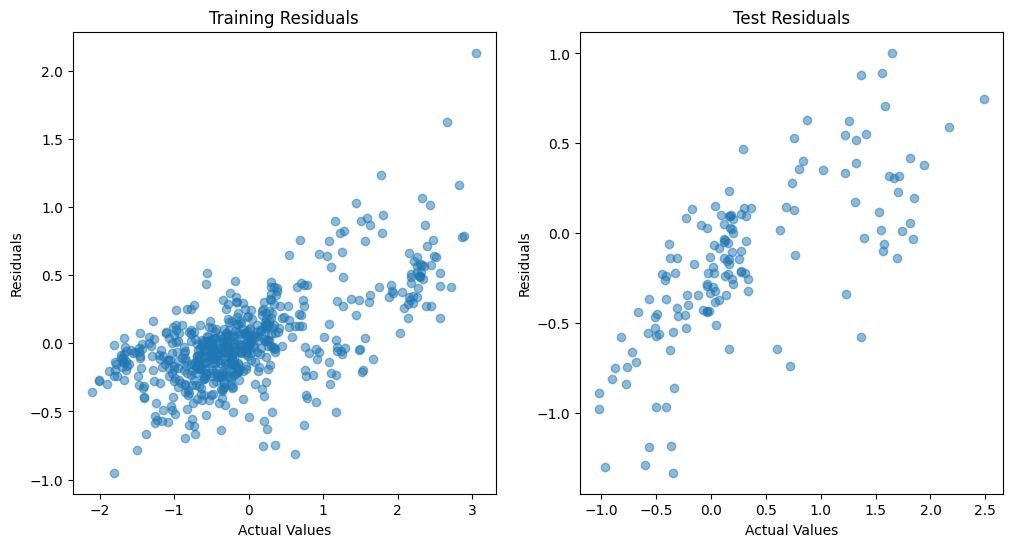

In [ ]:
# Residual Plots
import matplotlib.pyplot as plt

# Training and evaluating individual models
lr_train_predictions, lr_test_predictions = linear_regression(X_train, y_train, X_test)
rf_train_predictions, rf_test_predictions = random_forest(X_train, y_train, X_test)
gb_train_predictions, gb_test_predictions = gradient_boosting(X_train, y_train, X_test)
sarima_train_predictions, sarima_test_predictions = sarima(y_train, y_test)
lstm_train_predictions, lstm_test_predictions = lstm(X_train, y_train, X_test)

# Averaging the predictions for ensemble
ensemble_train_predictions = np.mean([lr_train_predictions, rf_train_predictions, gb_train_predictions, sarima_train_predictions, lstm_train_predictions], axis=0)
ensemble_test_predictions = np.mean([lr_test_predictions, rf_test_predictions, gb_test_predictions, sarima_test_predictions, lstm_test_predictions], axis=0)

# Residual plots
import matplotlib.pyplot as plt

residuals_train = y_train - ensemble_train_predictions
residuals_test = y_test - ensemble_test_predictions

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, residuals_train, alpha=0.5)
plt.title('Training Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals_test, alpha=0.5)
plt.title('Test Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


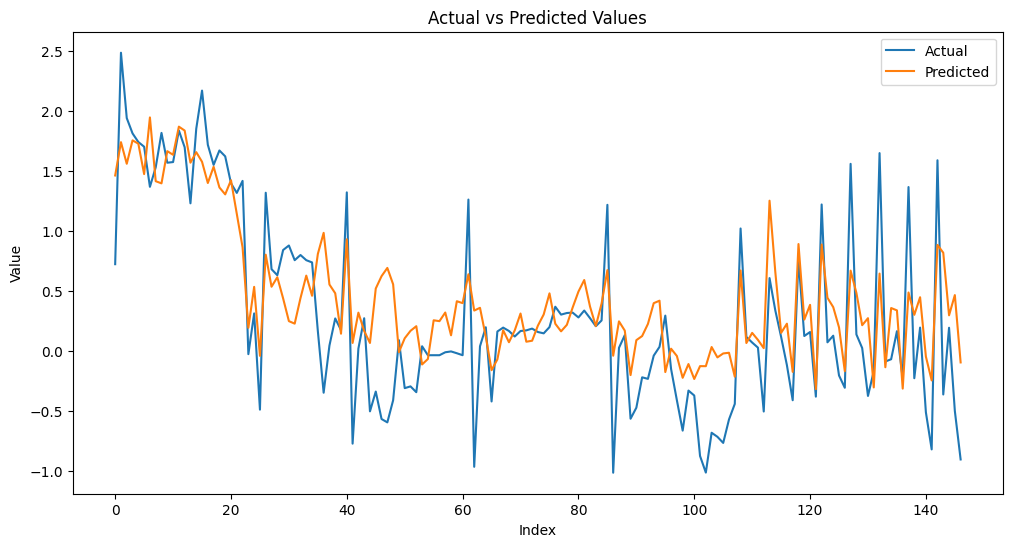

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(ensemble_test_predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

Resource: https://chat.openai.com/share/18265774-2d1a-4c1b-8623-6e6d6a643cc8